# Overfitting and Early Stopping

## Introduction

In previous lessons, we have seen that decision trees choose features that split our data into different groups of target variables.  For example, when we look at the decision tree for customer leads, our tree perfectly segments our dataset between customers and non-customers.

![](DTreeViz_customers.svg)

## Working with the diabetes dataset

For this lesson, let's work with the diabetes dataset provided with sklearn.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
dataset = load_diabetes()
X = dataset['data']
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
     X, y, test_size=0.33, random_state=42)

So we have ten features and close to 300 observations.

## Training our decision tree

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [7]:
dtr.score(X_train, y_train)

1.0

Look at the score above, our first perfectly fit model.  Of course, what really matters is how well our decision tree performs on data it has not yet seen.

In [8]:
dtr.score(X_val, y_val)

-0.12155057845214423

![](./d-tree.png)

### Correcting for Overfitting

### Setting parameters in SKLearn

The technique we learned above is called *early stopping*.  We can accomplish early stopping in `sklearn` by initializing our tree with either a `max_depth` parameter or a `min_samples_leaf` parameter.

In [9]:
sample_scores = []
for min_sample in range(1, 100, 5):
    dtr = DecisionTreeRegressor(min_samples_leaf=min_sample)
    dtr.fit(X_train, y_train)
    score = dtr.score(X_val, y_val)
    sample_scores.append([min_sample, score])

In [11]:
import numpy as np
wrapped_scores = np.array(sample_scores)

array([-0.07789903,  0.15146949,  0.27041537,  0.2958721 ,  0.32648873,
        0.41728477,  0.41184401,  0.39078211,  0.40033844,  0.41586698,
        0.40301003,  0.40084474,  0.39823474,  0.39823474,  0.39823474,
        0.39800567,  0.38842757,  0.36275669,  0.37109876,  0.24665244])

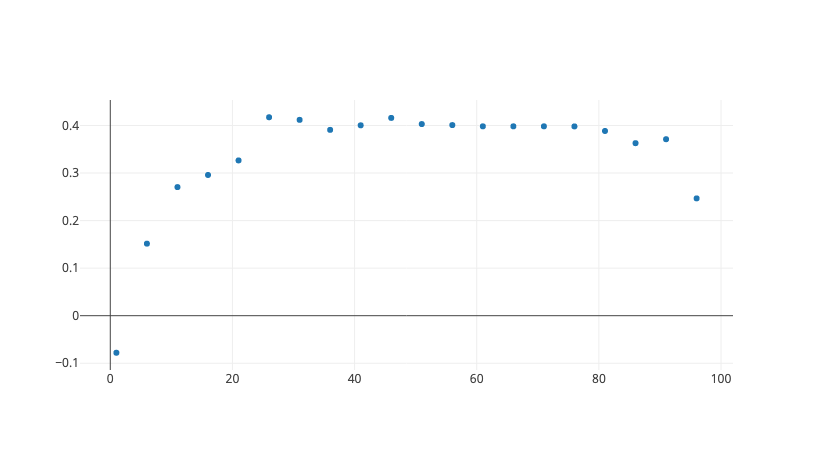

In [14]:
from graph import trace_values, plot
trace = trace_values(wrapped_scores[:, 0], wrapped_scores[:, 1])
plot([trace])

In [16]:
X_val.shape

(146, 10)

In [15]:
dtc = DecisionTreeRegressor(min_samples_leaf=26)
dtc.fit(X_train, y_train)
dtc.score(X_val, y_val)

0.4172847697584723

In [ ]:
dtc.score(X_test, y_va)

In [24]:
from plot_tree import plot_tree
# plot_tree(dtc, feature_names=dataset['feature_names'], max_depth=None)